In [1]:
!pip install gilp >/dev/null 2>&1

In [2]:
from gilp.simplex import LP
import numpy as np
from scipy.optimize import linprog
from gilp.simplex import LP
from gilp.visualize import simplex_visual
import matplotlib.pyplot as plt


First example (i.e., "EX1")
maximize $5x_1+3x_2$ subject to

$ \begin{align*}
    2x_1+x_2\le 20\\
    x_1+x_2\le 16\\
    3x_1+2x_2\le 35
\end{align*}
 $

Second example (i.e., "EX2" it is unbounded)
maximize $5x_1+6x_2$ subject to

$
\begin{align*}
x_1+2x_2\ge 8\\
6x_1+4x_2\ge 36\\
x_1\ge 7
\end{align*}
$

In [3]:
choice="EX2"

In [4]:
if choice=="EX1":
  c=np.array([5,3])
  A=np.array([[2,1],[1,1],[3,2]])
  b=np.array([20,16,35])
  x1_bounds=(0,None)
  x2_bounds=(0,None)
elif choice=="EX2":
  c=np.array([2,1])
  A=np.array([[1,-1],[2,-1]])
  b=np.array([10,40])
  x1_bounds=(0,None)
  x2_bounds=(0,None)
else:
  c=np.array([1,1])
  A=np.array([[1,-3],[2,3]])
  b=np.array([4,17])
  x1_bounds=(0,None)
  x2_bounds=(0,None)

GILP chokes on unbounded problems. Did not take the time to investigate so i skipped EX2 and plot the region at the end of the notebook using matplotlib

In [5]:
if choice!="EX2":
  lp=LP(A,b,c)
  simplex_visual(lp).show()

For EX2 there is no maximum since it is unbounded.

In [6]:
# linprog computes the min. If we want to maximize we minimize the negative
c=[-x for x in c]

res=linprog(c,A,b,bounds=[x1_bounds,x2_bounds])

In [7]:
print("optimal value is {} for {}".format(res.fun,res.x))

optimal value is None for None


Plot the feasible region for the unbounded problem (EX2)

Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

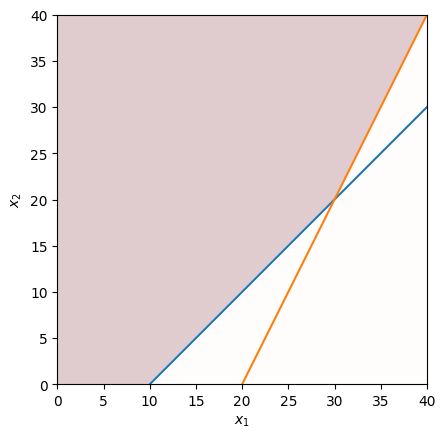

In [8]:
if choice=="EX2":
  d = np.linspace(0,40,300)
  x,y = np.meshgrid(d,d)
  plt.imshow( ((x<=10+y) & (2*x<=40+y) ).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Reds", alpha = 0.2);
  x = np.linspace(0, 40, 500)
  y1=x-10
  y2=2*x-40
  plt.plot(x,y1)
  plt.plot(x,y2)
  plt.ylim(0,40)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")